In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "http://books.toscrape.com"

In [3]:
response=requests.get( "http://books.toscrape.com")

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
books = soup.find_all('article', class_='product_pod')
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    print(f"Title: {title}\nPrice: {price}\n")

Title: A Light in the Attic
Price: Â£51.77

Title: Tipping the Velvet
Price: Â£53.74

Title: Soumission
Price: Â£50.10

Title: Sharp Objects
Price: Â£47.82

Title: Sapiens: A Brief History of Humankind
Price: Â£54.23

Title: The Requiem Red
Price: Â£22.65

Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: Â£22.60

Title: The Black Maria
Price: Â£52.15

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price: Â£13.99

Title: Shakespeare's Sonnets
Price: Â£20.66

Title: Set Me Free
Price: Â£17.46

Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price: Â£52.29

Title: Rip it Up and Start Again
Price: Â£35.02

Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Price: Â£57.25

Title: Olio
Price

In [6]:
book_data = []
books = soup.find_all('article', class_='product_pod')
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    print(f"Title: {title}\nPrice:{price}\n")
    book_data.append({"Title": title, "price": price})

Title: A Light in the Attic
Price:Â£51.77

Title: Tipping the Velvet
Price:Â£53.74

Title: Soumission
Price:Â£50.10

Title: Sharp Objects
Price:Â£47.82

Title: Sapiens: A Brief History of Humankind
Price:Â£54.23

Title: The Requiem Red
Price:Â£22.65

Title: The Dirty Little Secrets of Getting Your Dream Job
Price:Â£33.34

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price:Â£17.93

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price:Â£22.60

Title: The Black Maria
Price:Â£52.15

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price:Â£13.99

Title: Shakespeare's Sonnets
Price:Â£20.66

Title: Set Me Free
Price:Â£17.46

Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price:Â£52.29

Title: Rip it Up and Start Again
Price:Â£35.02

Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Price:Â£57.25

Title: Olio
Price:Â£23.88

Title:

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(book_data)
print()

In [9]:
book_data = []
conversion_rate = 104 

for book in books:
    title = book.h3.a['title']
    price_gbp = book.find('p', class_='price_color').text 
    
  
    price_gbp_cleaned = price_gbp.replace('£', '').replace('Â', '').strip()
    
    try:
       
        price_gbp_value = float(price_gbp_cleaned) if price_gbp_cleaned else 0.0
        
        
        price_inr = price_gbp_value * conversion_rate
    
        print(f"Title: {title}\nPrice (GBP): £{price_gbp_value:.2f}\nPrice (INR): ₹{price_inr:.2f}\n")
        book_data.append({
            "Title": title,
            "Price (GBP)": f"£{price_gbp_value:.2f}",
            "Price (INR)": f"₹{price_inr:.2f}"
        })
    except ValueError:
        print(f"Error converting price for '{title}': {price_gbp}")

Title: A Light in the Attic
Price (GBP): £51.77
Price (INR): ₹5384.08

Title: Tipping the Velvet
Price (GBP): £53.74
Price (INR): ₹5588.96

Title: Soumission
Price (GBP): £50.10
Price (INR): ₹5210.40

Title: Sharp Objects
Price (GBP): £47.82
Price (INR): ₹4973.28

Title: Sapiens: A Brief History of Humankind
Price (GBP): £54.23
Price (INR): ₹5639.92

Title: The Requiem Red
Price (GBP): £22.65
Price (INR): ₹2355.60

Title: The Dirty Little Secrets of Getting Your Dream Job
Price (GBP): £33.34
Price (INR): ₹3467.36

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price (GBP): £17.93
Price (INR): ₹1864.72

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price (GBP): £22.60
Price (INR): ₹2350.40

Title: The Black Maria
Price (GBP): £52.15
Price (INR): ₹5423.60

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price (GBP): £13.99
Price (INR): ₹1454.96

Title: Shakespeare's Sonnets
Price

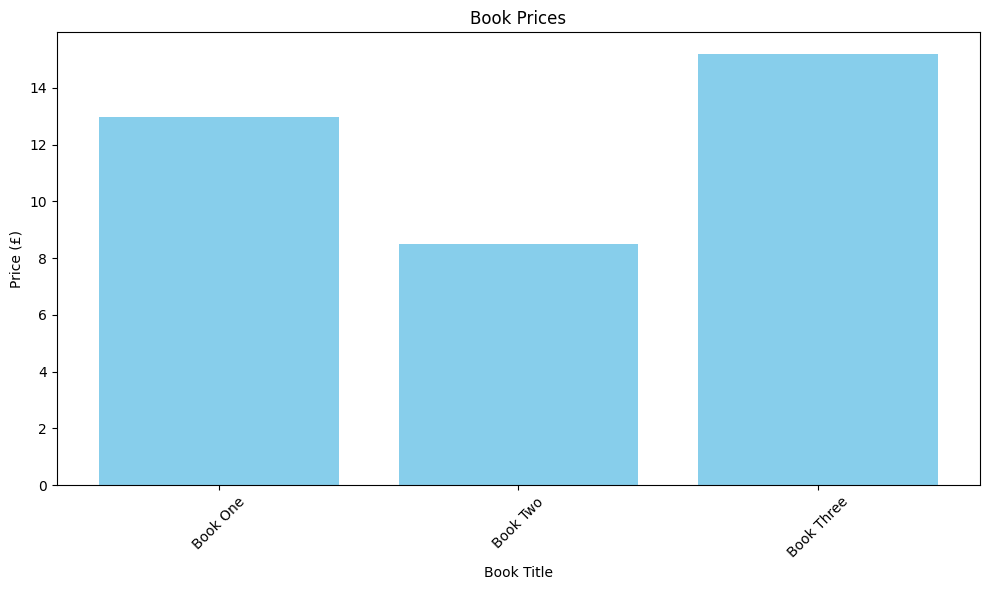

In [10]:
import matplotlib.pyplot as plt


book_data = [
    {"Title": "Book One", "price": "£12.99"},
    {"Title": "Book Two", "price": "£8.50"},
    {"Title": "Book Three", "price": "£15.20"},
]


titles = [book["Title"] for book in book_data]
prices = [float(book["price"].lstrip('£')) for book in book_data]


plt.figure(figsize=(10, 6))
plt.bar(titles, prices, color='skyblue')
plt.xlabel("Book Title")
plt.ylabel("Price (£)")
plt.title("Book Prices")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
